# **Facebook ad compaign A/B test**

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import shapiro,mannwhitneyu,levene,ttest_ind
import scipy.stats as stats


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# A/B test objective

This is case study to measure effects of two bidding strategies provided by Facebook. A Facebook ad campaign with “maximum bidding” is served to “control group” and another campaign with “average bidding” is served to the “test group”. The A/B test has run for 1 month , objective is to analyze and present the results of this A/B test. 

**Objective**  of the study is to evaluate *Earning per Purchase* and *Conversion Rate*.

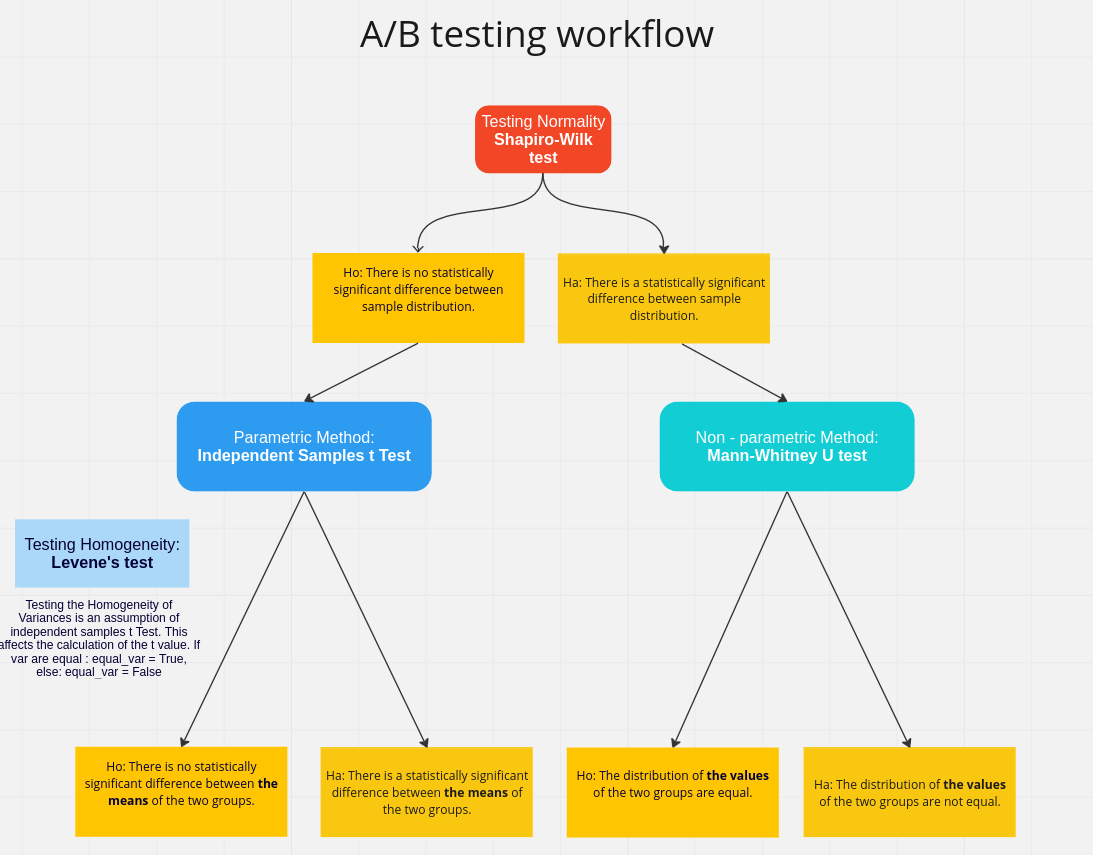

In [2]:
from IPython.display import Image, display
display(Image(filename='/kaggle/input/flowchart/Flowchart.png'))


# About the data

**Group A** - maximum bidding, control group.
**Group B** - average bidding, test group.

Columns:

**Impression**: The number of times an advertisement or content was displayed to users or viewers.

**Click**: The number of times users or viewers clicked on the advertisement or content after seeing it.

**Purchase**: The number of purchases made by users or viewers after clicking on the advertisement or content.

**Earning**: The earnings or revenue generated from the purchases made by users or viewers.

In [3]:
#control group = A
group_A = pd.read_csv("../input/ab-testing-examples-datasets/ab_testing_control.csv", index_col = 0)
#test group = B
group_B = pd.read_csv('../input/ab-testing-examples-datasets/ab_testing_test.csv',index_col = 0)

In [4]:
group_A.head()

,Impression,Click,Purchase,Earning
0,82529.459271,6090.077317,665.211255,2311.277143
1,98050.451926,3382.861786,315.084895,1742.806855
2,82696.023549,4167.965750,458.083738,1797.827447
3,109914.400398,4910.882240,487.090773,1696.229178
4,108457.762630,5987.655811,441.034050,1543.720179


In [5]:
group_B.head()

,Impression,Click,Purchase,Earning
0,120103.503796,3216.547958,702.160346,1939.611243
1,134775.943363,3635.082422,834.054286,2929.405820
2,107806.620788,3057.143560,422.934258,2526.244877
3,116445.275526,4650.473911,429.033535,2281.428574
4,145082.516838,5201.387724,749.860442,2781.697521


# Feature engineering & descriptive statistics

Lets add conversion rate and Earning per Purchase to the data and merge.

In [6]:
#Feature Engineering: Conversion Rate
group_A["Conversion Rate"] = group_A["Purchase"]/group_A["Click"]*100
group_B["Conversion Rate"] = group_B["Purchase"]/group_B["Click"]*100

#Feature Engineering: Earning per Purchase
group_A["Earning per Purchase"] = group_A["Earning"]/group_A["Purchase"]
group_B["Earning per Purchase"] = group_B["Earning"]/group_B["Purchase"]

#Data Manipulation: Indication of Groups in A New Variable
group_A["Group"] = "GroupA"
group_B["Group"] = "GroupB"

#Combining the Datasets
data = pd.concat([group_A, group_B], ignore_index=True)



data.head()


,Impression,Click,Purchase,Earning,Conversion Rate,Earning per Purchase,Group
0,82529.459271,6090.077317,665.211255,2311.277143,10.922870,3.474501,GroupA
1,98050.451926,3382.861786,315.084895,1742.806855,9.314152,5.531229,GroupA
2,82696.023549,4167.965750,458.083738,1797.827447,10.990583,3.924670,GroupA
3,109914.400398,4910.882240,487.090773,1696.229178,9.918600,3.482368,GroupA
4,108457.762630,5987.655811,441.034050,1543.720179,7.365721,3.500229,GroupA


In [7]:
data.query('Group == "GroupA"').describe()

,Impression,Click,Purchase,Earning,Conversion Rate,Earning per Purchase
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,101711.449068,5100.657373,550.894059,1908.568300,11.592561,3.688075
std,20302.157862,1329.985498,134.108201,302.917783,4.542166,1.137500
min,45475.942965,2189.753157,267.028943,1253.989525,4.040271,1.826339
25%,85726.690349,4124.304129,470.095533,1685.847205,8.524955,2.974351
50%,99790.701078,5001.220602,531.206307,1975.160522,10.956727,3.491217
75%,115212.816543,5923.803596,637.957088,2119.802784,14.482369,4.082826
max,147539.336329,7959.125069,801.795020,2497.295218,30.436402,6.710130


In [8]:
data.query('Group == "GroupB"').describe()

,Impression,Click,Purchase,Earning,Conversion Rate,Earning per Purchase
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,120512.411758,3967.549761,582.106097,2514.890733,15.656625,4.652949
std,18807.448712,923.095073,161.152513,282.730852,6.815625,1.361653
min,79033.834921,1836.629861,311.629515,1939.611243,6.365104,2.646708
25%,112691.970770,3376.819024,444.626828,2280.537426,11.026129,3.660277
50%,119291.300775,3931.359804,551.355732,2544.666107,14.618162,4.448843
75%,132050.578933,4660.497911,699.862360,2761.545405,18.300481,5.514351
max,158605.920483,6019.695079,889.910460,3171.489708,44.788552,8.186783


# Data Vizz: Boxplot

In [9]:
import plotly.express as px

# Variables
variables = ['Impression', 'Click', 'Purchase', 'Earning', 'Conversion Rate', 'Earning per Purchase']

# Create a separate boxplot for each variable
for variable in variables:
    fig = px.box(data, x="Group", y=variable, color="Group", title=f'Boxplot of {variable} for Groups A and B')
    fig.show()

# Data Vizz: Pairplot

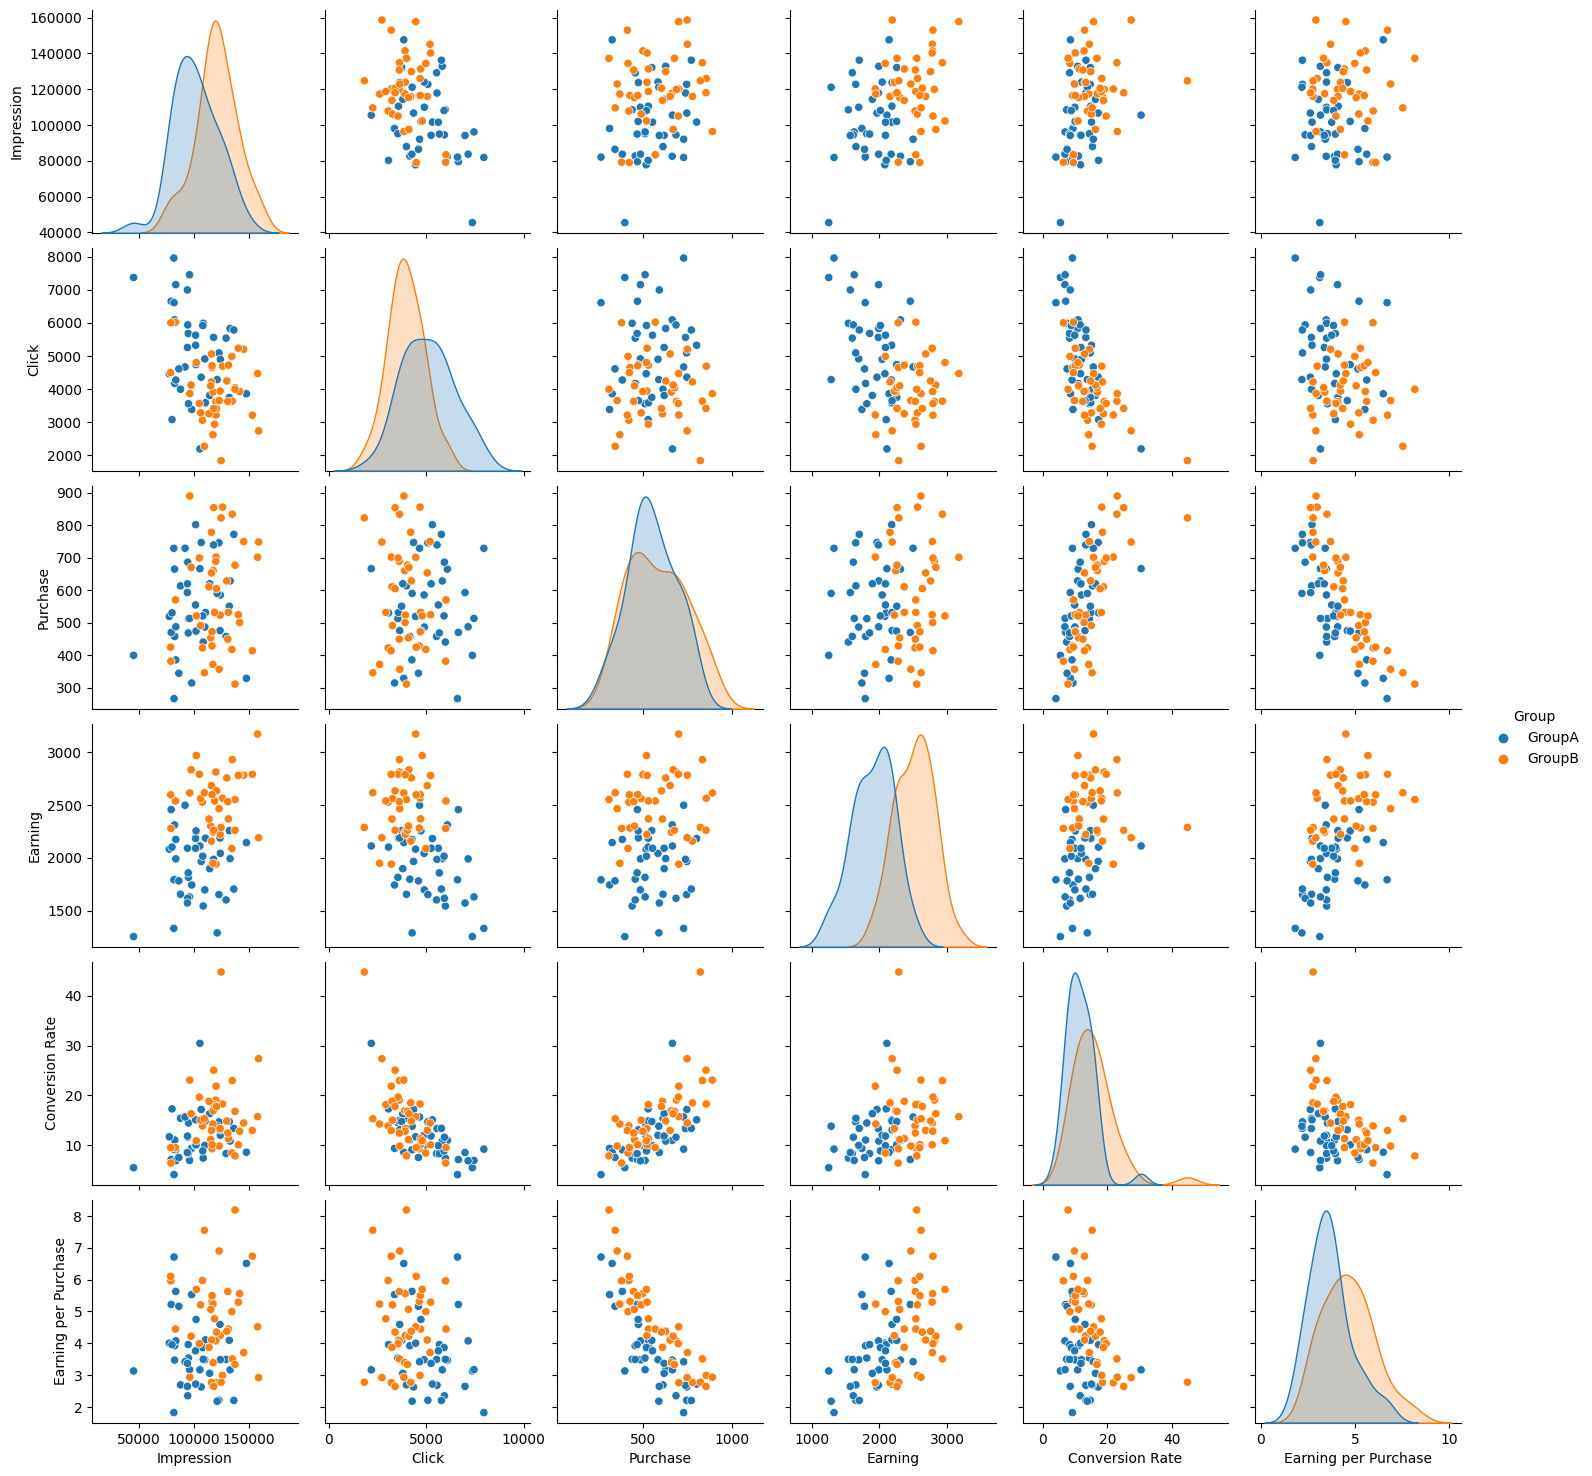

In [10]:
import seaborn as sns

sns.pairplot(data, hue='Group')

# Assumptions based on discriptive statistics, Hypothesis. 

There seem to be a clear difference between group A and group B. Lets test the following hypothesis:

- Ho: There is no difference in Conversion rate and Earning per Purchase 
- Ha: There is a difference in Conversion rate and Earning per Purchase 

In [11]:
def hypothesis_test(df_A, df_B, col_name):
    test_stat_A, pvalue_A = shapiro(df_A[col_name])
    print('Shapiro Test Stat group A = %.4f, p-value = %.4f' % (test_stat_A, pvalue_A))

    test_stat_B, pvalue_B = shapiro(df_B[col_name])
    print('Shapiro Test Stat group B = %.4f, p-value = %.4f' % (test_stat_B, pvalue_B))


    if pvalue_A < 0.05 and pvalue_B < 0.05:
        test_stat, pvalue = mannwhitneyu(df_A[col_name],
                                         df_B[col_name])
        print('shapiro p-value < 0.05, not normal distribution => Mann Whitneye Test ')
        print('Mann Whitneye Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
        print(f'H0 hypothesis {"NOT REJECTED" if pvalue > 0.05 else "REJECTED"}')
        
    else:
        test_stat_var, pvalue_var = levene(df_A[col_name],
                                        df_B[col_name])
        print('Levene Test Stat = %.4f, p-value = %.4f' % (test_stat_var, pvalue_var))
        
        test_stat, pvalue = ttest_ind(df_A[col_name],
                                         df_B[col_name],
                                      equal_var=(True if pvalue_var > 0.05 else False))

        print('Ttest Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
        print(f'H0 hypothesis {"NOT REJECTED" if pvalue > 0.05 else "REJECTED"}')

In [12]:
group_A = data.query('Group == "GroupA"')
group_B = data.query('Group == "GroupB"')

variables = ['Impression', 'Click', 'Purchase', 'Earning','Conversion Rate', 'Earning per Purchase'] # 



In [13]:
for variable in variables:
    print('Testing:', variable)
    hypothesis_test(group_A,group_B, variable)
    print('*********')

Testing: Impression
Shapiro Test Stat group A = 0.9697, p-value = 0.3514
Shapiro Test Stat group B = 0.9720, p-value = 0.4148
Levene Test Stat = 0.5865, p-value = 0.4461
Ttest Test Stat = -4.2966, p-value = 0.0000
H0 hypothesis REJECTED
*********
Testing: Click
Shapiro Test Stat group A = 0.9844, p-value = 0.8461
Shapiro Test Stat group B = 0.9896, p-value = 0.9699
Levene Test Stat = 6.3041, p-value = 0.0141
Ttest Test Stat = 4.4266, p-value = 0.0000
H0 hypothesis REJECTED
*********
Testing: Purchase
Shapiro Test Stat group A = 0.9773, p-value = 0.5891
Shapiro Test Stat group B = 0.9589, p-value = 0.1541
Levene Test Stat = 2.6393, p-value = 0.1083
Ttest Test Stat = -0.9416, p-value = 0.3493
H0 hypothesis NOT REJECTED
*********
Testing: Earning
Shapiro Test Stat group A = 0.9756, p-value = 0.5306
Shapiro Test Stat group B = 0.9780, p-value = 0.6163
Levene Test Stat = 0.3532, p-value = 0.5540
Ttest Test Stat = -9.2545, p-value = 0.0000
H0 hypothesis REJECTED
*********
Testing: Conversion

# Conclusion
The A/B test indicates that the maximum bidding and average bidding strategies *yield significantly different results in terms of impressions, clicks, earnings, conversion rate, and earnings per purchase*. However, the *number of purchases did not significantly differ* between the two groups. 

In [14]:
# Compute the mean and median for each group and each metric
CR_a_mean, CR_a_median  = group_A['Conversion Rate'].mean(), group_A['Conversion Rate'].median()
CR_b_mean, CR_b_median = group_B['Conversion Rate'].mean(), group_B['Conversion Rate'].median()
EpP_a_mean, EpP_a_median  = group_A['Earning per Purchase'].mean(), group_A['Earning per Purchase'].median()
EpP_b_mean, EpP_b_median= group_B['Earning per Purchase'].mean(), group_B['Earning per Purchase'].median()

# Print the results
print(f'Mean and Median for Conversion Rate for Group A are: {CR_a_mean:.2f}, {CR_a_median:.2f} respectively, and for Group B: {CR_b_mean:.2f}, {CR_b_median:.2f} respectively.')
print(f'Mean and Median for Earning per Purchase for Group A are: {EpP_a_mean:.2f}, {EpP_a_median:.2f} respectively, and for Group B: {EpP_b_mean:.2f}, {EpP_b_median:.2f} respectively.')


Mean and Median for Conversion Rate for Group A are: 11.59, 10.96 respectively, and for Group B: 15.66, 14.62 respectively.
Mean and Median for Earning per Purchase for Group A are: 3.69, 3.49 respectively, and for Group B: 4.65, 4.45 respectively.


Regarding choosing the best strategy based on this dataset specifically, it appears that Group B - which utilized the **'Average Bidding' strategy** - is more effective. Based on both the mean and median metrics for conversion rate and earnings per purchase, Group B outperformed Group A. Specifically, Group B had a roughly **35% higher conversion rate** and around a **26% greater earning per purchase** compared to Group A.